# Increase the learning rate and also the size of the training set to see the bump move.

In [2]:
import sys
import os
sys.path.append('Jerome_scripts_Original/PGM/')
sys.path.append('selfPackages/')
sys.path.append('Jerome_scripts_Original/')
sys.path.append('ffmpeg-3.4.2-32bit-static/')

import numpy as np
import scipy as sc
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

try:
    import rbm
    import bm
except:
    print 'Compiling cy_utilities first'
    curr_dir = os.getcwd()
    os.chdir('PGM/')
    !python setup.py build_ext --inplace
    print 'Compilation done'
    os.chdir(curr_dir)
    
import pickle
from ising import IsingModel
import estimate_correlations_ising
from sklearn.utils import shuffle
import inlineMovies

In [ ]:
#import dill
#dill.dump_session('./data_bruckner/data/notebookData/17_BumpMove_High_learningRate')

In [ ]:
#import dill
#dill.load_session('./data_bruckner/data/notebookData/17_BumpMove_High_learningRate')

In [182]:
%%capture capt1
#Supress the output of the cell and save it to capt1

N = 100
beta = 1.
Num_configs = 20000

#Generate spins using Gibbs Sampling MCMC
BM = bm.BM(N=N,nature='Spin')

#Define Couplings
BM.layer.couplings =  beta* (np.eye(N=N,k=1) + np.eye(N=N,k=-1) )
BM.layer.couplings[0,-1] += beta
BM.layer.couplings[-1,0] += beta

data = BM.gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs,Nstep=200) # N steps.

#Train the model
RBM = rbm.RBM(visible = 'Spin', n_v=N, n_h = 3, hidden = 'Spin',zero_field = False)
results = RBM.fit(data,n_iter=250,verbose=0,learning_rate = 0.05,record=['W','FV','FH'],record_interval=1000,batch_size=10,N_MC= 20, lr_decay=False,batch_norm=False);

In [104]:
#from ffmpeg import ffmpeg 
#from ffmpy import FFmpeg
import inlineMovies
#reload(inlineMovies)
inlineMovies.generatePlot(Ydata=np.array(results['W']),Xdata=None,xlim=None,ylim=None,frames=None,interval=20)

ValueError: I/O operation on closed file

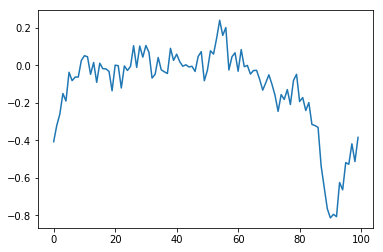

In [195]:
plt.plot(np.array(results['W'])[-15,1,:])

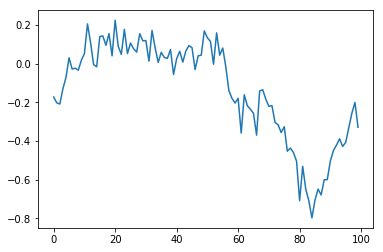

In [177]:
plt.plot(np.array(results['W'])[-150,1,:])

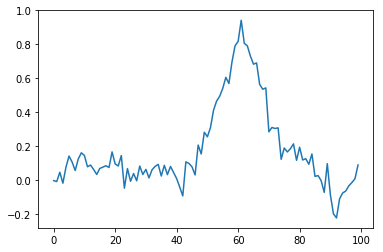

In [178]:
plt.plot(np.array(results['W'])[-100,2,:])

## Find the peak by absloute max value and check the time evolution:

In [196]:
peakCentre = np.zeros([np.shape(np.array(results['W']))[0],np.shape(np.array(results['W']))[1]])
peakCentre = np.argmax(abs(np.array(results['W'])),axis=2)

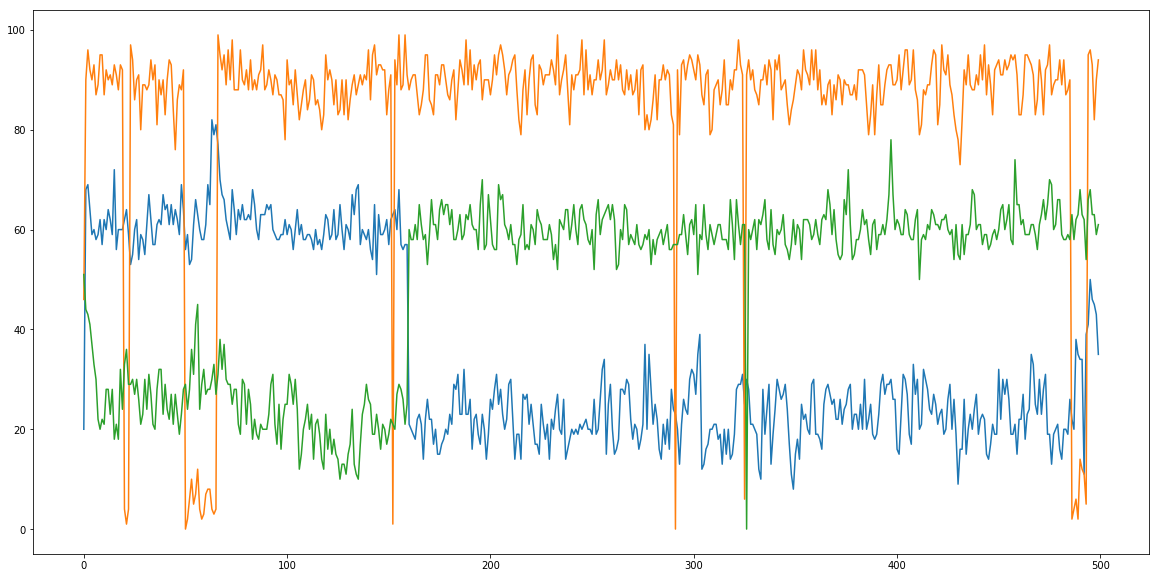

In [197]:
plt.figure(figsize=(20,10))
plt.plot(peakCentre)

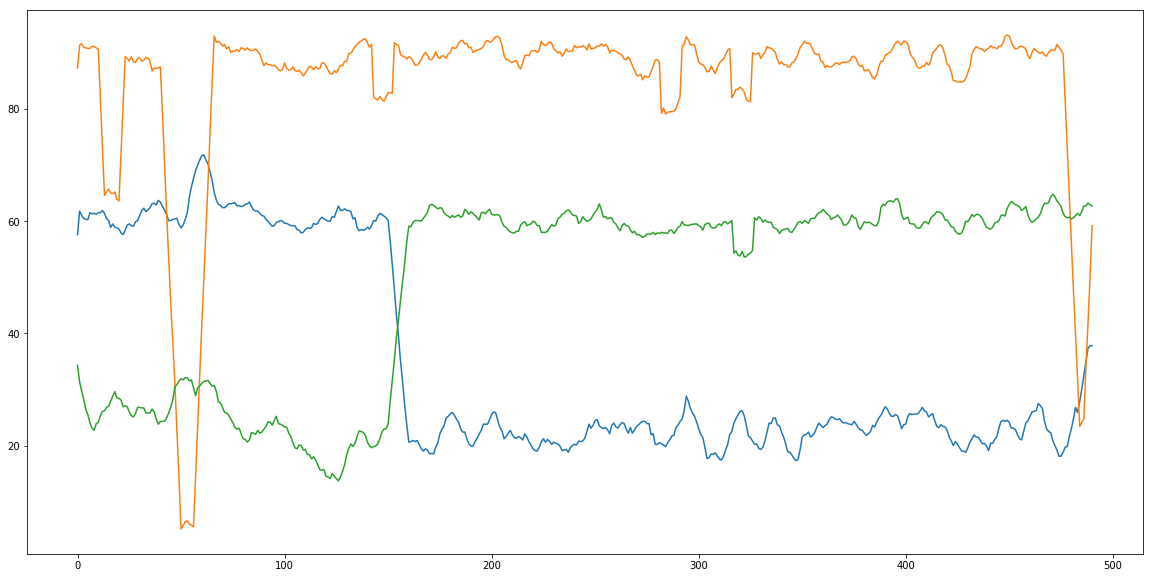

In [199]:
plt.figure(figsize=(20,10))
plt.plot(running_mean(peakCentre[:,0],10))
plt.plot(running_mean(peakCentre[:,1],10))
plt.plot(running_mean(peakCentre[:,2],10))

In [117]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [202]:
import peakDistance
reload(peakDistance)
peakDis = np.zeros([np.shape(np.array(results['W']))[0],np.shape(np.array(results['W']))[1]])

for i in np.arange(np.shape(peakCentre)[0]):
    peakDis[i,0] = peakDistance.peakDistance(peakCentre[i,0],peakCentre[i,1],100)
    peakDis[i,1] = peakDistance.peakDistance(peakCentre[i,0],peakCentre[i,2],100)
    peakDis[i,2] = peakDistance.peakDistance(peakCentre[i,1],peakCentre[i,2],100)

N = 20
smooth0 = running_mean(peakDis[:,0],N)
smooth1 = running_mean(peakDis[:,1],N)
smooth2 = running_mean(peakDis[:,2],N)

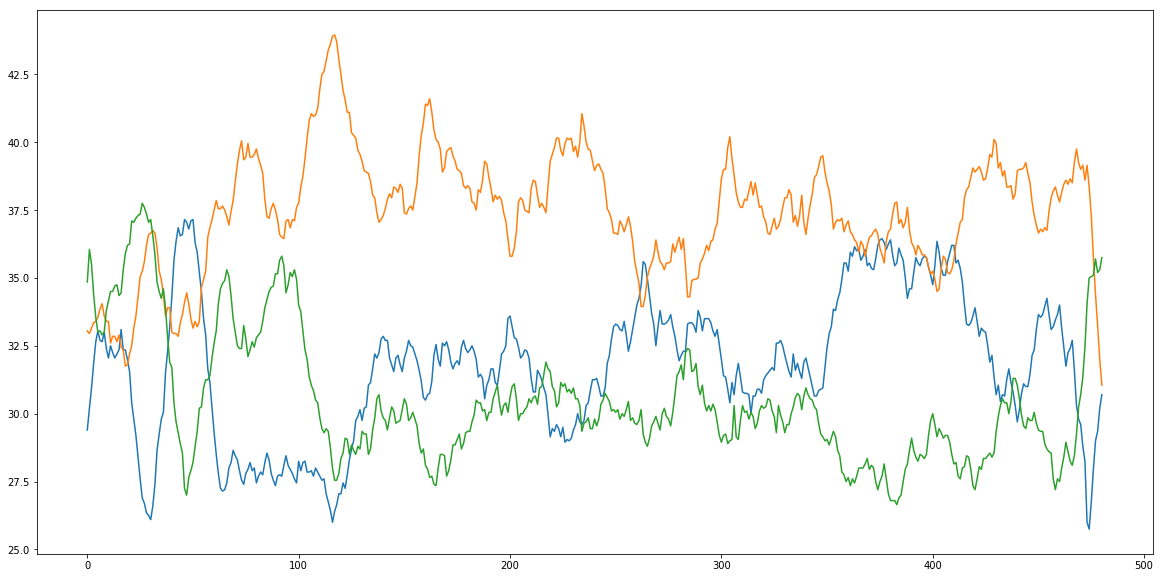

In [203]:
plt.figure(figsize=(20,10))
plt.plot(smooth0)
plt.plot(smooth1)
plt.plot(smooth2)

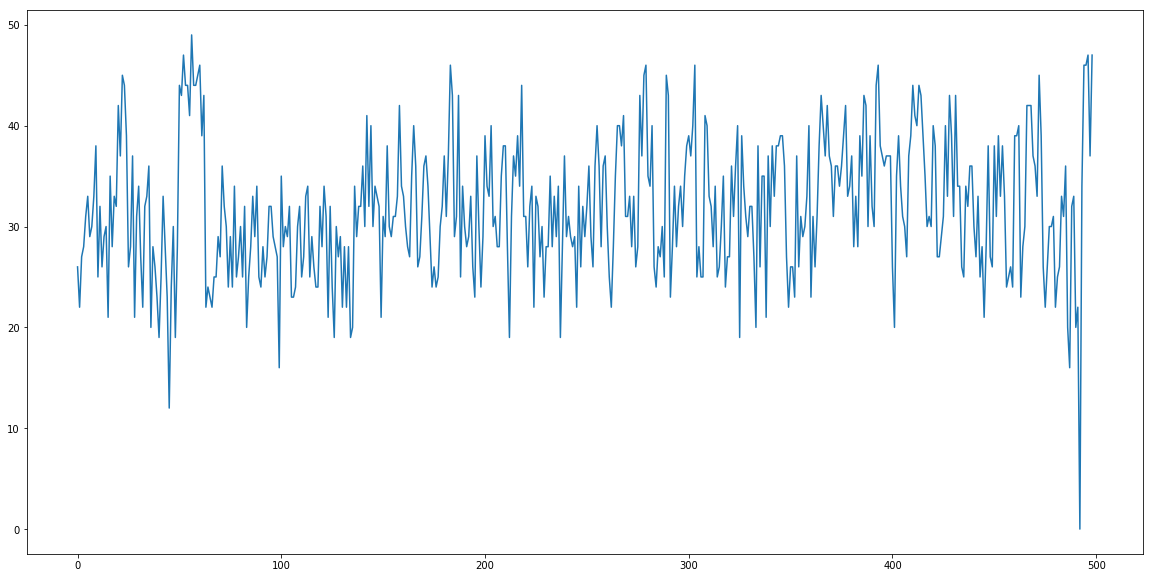

In [201]:
plt.figure(figsize=(20,10))
plt.plot(peakDis[0:-1,0])

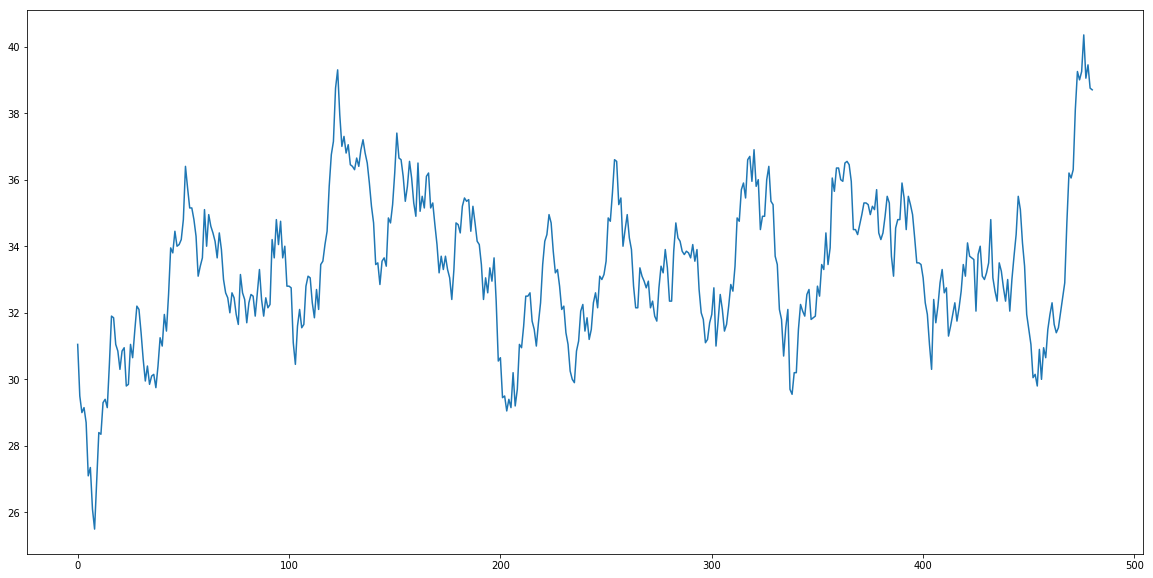

In [156]:
plt.figure(figsize=(20,10))
plt.plot(smooth0)
#plt.plot(smooth1)
#plt.plot(smooth2)

## Increase the training set size to get a smoother landscape (Also will have to increase the batch size for it to do finish faster). Also increasing step of MC to generate data for independence.

In [ ]:
%%capture capt1
#Supress the output of the cell and save it to capt1

N = 100
beta = 1.
Num_configs = 100000

#Generate spins using Gibbs Sampling MCMC
BM = bm.BM(N=N,nature='Spin')

#Define Couplings
BM.layer.couplings =  beta* (np.eye(N=N,k=1) + np.eye(N=N,k=-1) )
BM.layer.couplings[0,-1] += beta
BM.layer.couplings[-1,0] += beta

data = BM.gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs,Nstep=400) # N steps.

#Train the model
RBM = rbm.RBM(visible = 'Spin', n_v=N, n_h = 2, hidden = 'Spin',zero_field = True)
results = RBM.fit(data,n_iter=250,verbose=0,learning_rate = 0.1,record=['W'],record_interval=1000,batch_size=100,N_MC= 20, lr_decay=False,batch_norm=False);

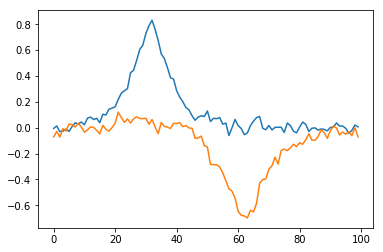

In [28]:
plt.plot(np.array(results['W'])[150,0,:])
plt.plot(np.array(results['W'])[150,1,:])

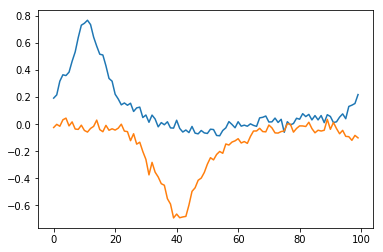

In [29]:
plt.plot(np.array(results['W'])[50,0,:])
plt.plot(np.array(results['W'])[50,1,:])

In [6]:
inlineMovies.generatePlot(Ydata=np.array(results['W']),Xdata=None,xlim=None,ylim=None,frames=None,interval=20)

ValueError: I/O operation on closed file

In [16]:
peakCentre = np.zeros([np.shape(np.array(results['W']))[0],np.shape(np.array(results['W']))[1]])
peakCentre = np.argmax(abs(np.array(results['W'])),axis=2)

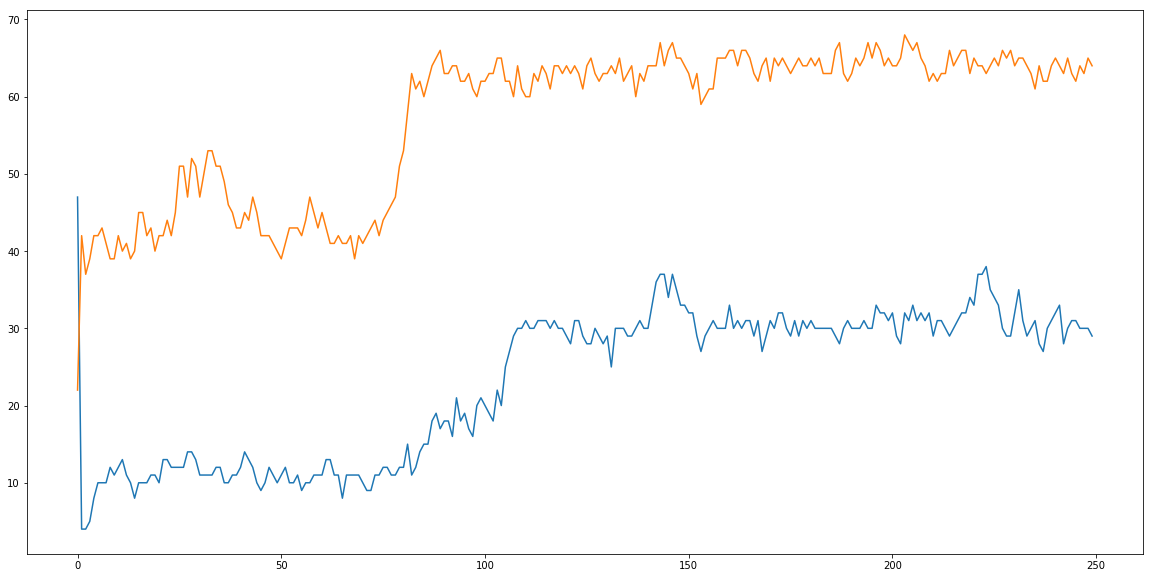

In [17]:
plt.figure(figsize=(20,10))
plt.plot(peakCentre)

In [ ]:
%%capture capt2
#Supress the output of the cell and save it to capt1

N = 100
beta = 1.
Num_configs2 = 1000000

#Generate spins using Gibbs Sampling MCMC
BM2 = bm.BM(N=N,nature='Spin')

#Define Couplings
BM2.layer.couplings =  beta* (np.eye(N=N,k=1) + np.eye(N=N,k=-1) )
BM2.layer.couplings[0,-1] += beta
BM2.layer.couplings[-1,0] += beta

data2 = BM2.gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs2,Nstep=400) # N steps.

#Train the model
RBM2 = rbm.RBM(visible = 'Spin', n_v=N, n_h = 2, hidden = 'Spin',zero_field = True)
results2 = RBM2.fit(data2,n_iter=250,verbose=0,learning_rate = 0.1,record=['W'],record_interval=1000,batch_size=100,N_MC= 20, lr_decay=False,batch_norm=False);

## High Learning rate with regularization (l2 or l1) - a regularization term keeps the sparsity by maintaining a peak and if the peak is maintained at even high learning rates on a smooth landscape - we might get full dynamics.

In [34]:
%%capture capt3
#Supress the output of the cell and save it to capt1

N = 100
beta = 1.
Num_configs3 = 100000

#Generate spins using Gibbs Sampling MCMC
BM3 = bm.BM(N=N,nature='Spin')

#Define Couplings
BM3.layer.couplings =  beta* (np.eye(N=N,k=1) + np.eye(N=N,k=-1) )
BM3.layer.couplings[0,-1] += beta
BM3.layer.couplings[-1,0] += beta

data3 = BM3.gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs3,Nstep=400) # N steps.

#Train the model
RBM3 = rbm.RBM(visible = 'Spin', n_v=N, n_h = 2, hidden = 'Spin',zero_field = True)
results3 = RBM3.fit(data3,n_iter=250,verbose=0,learning_rate = 0.05,l2 = 0.01,record=['W'],record_interval=1000,batch_size=100,N_MC= 20, lr_decay=False,batch_norm=False);

In [38]:
peakCentre3 = np.zeros([np.shape(np.array(results3['W']))[0],np.shape(np.array(results3['W']))[1]])
peakCentre3 = np.argmax(abs(np.array(results3['W'])),axis=2)

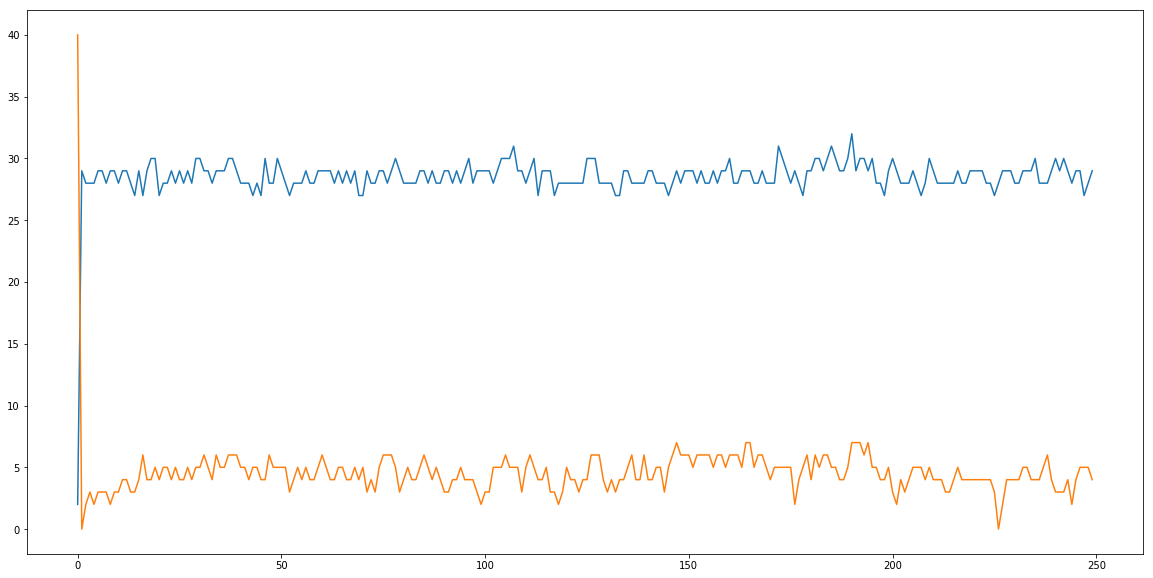

In [39]:
plt.figure(figsize=(20,10))
plt.plot(peakCentre3)

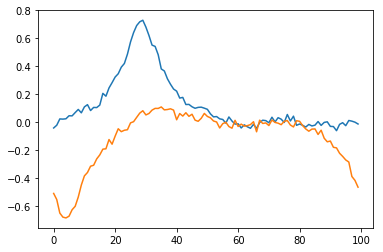

In [40]:
plt.plot(np.array(results3['W'])[-1,0,:])
plt.plot(np.array(results3['W'])[-1,1,:])